# Importing Dependecies

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("data/IMDB-dataset.csv")

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

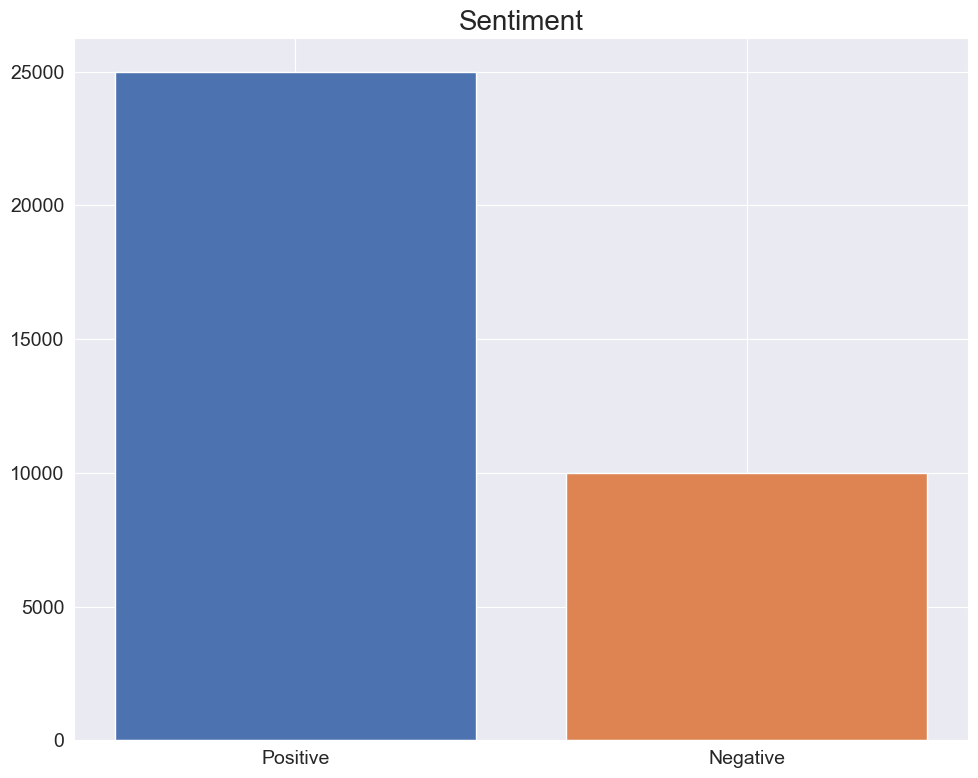

In [7]:
df_positive = df[df['sentiment']=='positive'][:40000]
df_negative = df[df['sentiment']=='negative'][:10000]

df = pd.concat([df_positive, df_negative])

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('font', size=14)

colors = sns.color_palette('deep')

plt.figure(figsize=(10,8), tight_layout=True)
plt.bar(x=['Positive', 'Negative'], height=df.value_counts(['sentiment']), color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')

plt.show()

In [19]:
pip install --upgrade imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ------------------------------------ --- 235.5/258.3 kB 7.3 MB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 5.3 MB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 756.3 kB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installatio

In [23]:
pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/17/1c/ccdd103cfcc9435a18819856fbbe0c20b8fa60bfc3343580de4be13f0668/scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.2/11.0 MB 10.9 MB/s eta 0:00:01
   - -------------------------------------- 0.3/11.0 MB 3.6 MB/s eta 0:00:03
   - -------------------------------------- 0.5/11.0 MB 3.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/11.0 MB 3.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.0 MB 3.5 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.0 MB 3.2 MB/s eta 0:00:04
   --- ------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\mamai\\anaconda3\\Lib\\site-packages\\~klearn\\datasets\\_svmlight_format_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [24]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

# Perform resampling
X_resampled, y_resampled = rus.fit_resample(df[['review']], df['sentiment'])

# Combine the resampled data into one DataFrame
df_bal = pd.DataFrame(X_resampled, columns=['review'])
df_bal['sentiment'] = y_resampled

# Check distribution of 'sentiment' before and after balancing
print("Original dataset distribution:")
print(df['sentiment'].value_counts())
print('---------------')
print("Balanced dataset distribution:")
print(df_bal['sentiment'].value_counts())

# View the balanced DataFrame
df_bal.head()

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (c:\Users\mamai\anaconda3\Lib\site-packages\imblearn\utils\_validation.py)

In [ ]:
#Splitting the dataset into train and test data sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_bal, test_size=0.33, random_state=42)

train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

print(test_y)